# Exploring Unfairness in Data

## Learning Objectives
* Understanding and Applying Linear Regression
* Data Exploration
* Practice ML Workflow: Training, Testing, and Evaluation

## Credits
This assignment was published at the Symposium on Educational Advances in Artificial Intelligence, 2020, and slightly modified to suit this course.

[Chen, Larsen and Neumann, Exploring Unfairness and Bias in Data, EAAI 2020](http://modelai.gettysburg.edu/2020/bias/)

## Outline

1. [Unfairness](#1.-Unfairness)
2. [Exploring Loan Approval Data](#2.-Exploring-Loan-Approval-Data)
3. [Building a Model](#3.-Building-a-Model)
4. [Becoming Data and Fairness Aware](#4.-Becoming-Data-and-Fairness-Aware)

## 1. Unfairness

It is natural to assume that a model built from "real-world" data will inherently represent the world at large. We often take the data that we have for granted, especially when we are first getting started with building AI systems. However, if we do not pay attention to what our data look like, how they were collected, and what features they contain, we may unknowingly create models that propagate cultural biases and unfairness.

![hire](utility/images/undraw_hire_te5y.png)

In 2014, Amazon began building programs that could automate the hiring process for engineers. They wanted a machine to be able to pick out the top resumes from the thousands they receive every year. They trained their model on all of the resumes that they had, hoping that the model would be able to identify trends in keyword frequency within those applications. If most applications contained the word "intern," then one might reasonably expect that a resume containing it would be ranked higher than one that doesn't. However, as they began to deploy their model, it became increasingly apparent that the model was discriminating against women. When engineers investigated why this was the case, they found that the data they trained the model with, the resumes, had mostly come from men. The model had learned to prefer resumes that didn't contain the word "women's" because that word wasn't frequent seen during its training. Although gender was not explicitly a feature of the dataset, it was still present in the dataset, encoded within the experiences that applicants reported.

Amazon's case serves as a reminder that we must be careful of our data, even more so today as data becomes cheaper to collect.

## 2. Exploring Loan Approval Data

Imagine that you are a data scientist at a bank and that one of your company's primary business areas is in lending money. The current loan approval process, that has been in place since the founding of the bank, has always relied on manual review of applications -- a process that is tedious and doesn't scale well in the modern age. The company wants to expand their business, but this archaic system is holding them back.

Think about how to approach this problem. You likely immediately thought of using the bank's past loan approval records to build a model that can learn how a human application reviewer decides which applications to approve and which to reject.

![approval](utility/images/undraw_accept_request_vdsd.png)

### Acquiring the Data



Before we begin, let's make sure that we have the data. The cell below checks if you have the `loan-payments.csv` file in the `utility/data` directory.

Next, let's load our data. In the cell below, we read our [CSV][1] file into a [Pandas][2] [`DataFrame`][3] called `data`.

[1]: https://en.wikipedia.org/wiki/Comma-separated_values
[2]: https://pandas.pydata.org/
[3]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from os.path import exists


data_dir = '/content/drive/My Drive/Colab Notebooks/fai/utility/data'

assert exists(f'{data_dir}/loan-payments.csv'), 'Loan data file is missing.'

In [ ]:
!pip3 install pandas
import pandas as pd

data = pd.read_csv(f'{data_dir}/loan-payments.csv')

Let's take a look at what we have.

In [ ]:
data

,loan_id,loan_status,principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bachelors,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bachelors,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,College,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,College,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,College,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,College,female


**Write-up!** How many examples are in our data set? How many features does it have? **[2 pts]**

In [ ]:

11 features, and 500 examples

**Write-up!** Come up with a short description of what you think each feature is and what type of feature each one is. Which column should be our target variable? Which ones do you think will be useful for our model? **[5 pts]**

# @title Default title text

    loan_status:
        Description: The current status of the loan
        Type: Categorical (nominal).
        Usefulness: This could be the target variable, especially if the goal is to predict whether a loan will be paid off or not.

    principal:
        Description: The principal amount of the loan.
        Type: Numerical (continuous).
        Usefulness: Likely to be a useful feature, as the loan amount can impact the likelihood of repayment.

    terms:
        Description: The terms of the loan, possibly the duration or specific conditions.
        Type: Categorical or ordinal, depending on whether it represents discrete categories or ordered levels.
        Usefulness: Could be useful, especially if it relates to the loan's duration or reYpayment conditions.

    effective_date:
        Description: The date when the loan becomes effective.
        Type: Date/Time.
        Usefulness: Might be useful in conjunction with other date features to calculate durations or as part of a time series analysis.

    due_date:
        Description: The date by which the loan should be repaid.
        Type: Date/Time.
        Usefulness: Important for calculating loan duration and understanding the repayment timeline.

    paid_off_time:
        Description: The actual time when the loan was paid off.
        Type: Date/Time.
        Usefulness: Critical if the target is predicting loan payoff time or status.

    past_due_days:
        Description: Number of days past the due date.
        Type: Numerical (continuous or discrete).
        Usefulness: Important for understanding repayment behavior.
    age:
        Description: Age of the borrower.
        Type: Numerical (continuous or discrete).
        Usefulness: Could be relevant, as age might correlate with financial stability and repayment ability.

    education:
        Description: The educational background of the borrower.
        Type: Categorical (nominal or ordinal if there is an inherent order).
        Usefulness: May provide insights into the borrower's financial literacy or earning potential.

    gender:
        Description: The gender of the borrower.
        Type: Categorical (binary if only male and female are considered).
        Usefulness: Could be relevant, though care must be taken to avoid gender-based biases.

Target Variable:

    Likely loan_status, especially if the goal is to predict the outcome of a loan.

Useful Features:

    Most of the features could be relevant for a loan repayment prediction model. However, features like loan_id might not be useful for modeling. Features like paid_off_time and past_due_days,age and education could be considered useful.

### Making Some Adjustments

Now let's drop the columns in `data` that contain features that we are not interested in. Since `loan_id`s are not informative for predicting new loans, we can ignore them. Additionally, `effective_date`, `due_date`, and `paid_time_off` are all encoded in `past_due_days`. It is unlikely that the specifics of when a loan was due is predictive of success.

In [ ]:
not_interested = ['loan_id', 'effective_date', 'due_date', 'paid_off_time']

data = data.drop(not_interested, axis=1)

Let's see our new data set.

In [ ]:
data.head()

,loan_status,principal,terms,past_due_days,age,education,gender
0,PAIDOFF,1000,30,NaN,45,High School or Below,male
1,PAIDOFF,1000,30,NaN,50,Bachelors,female
2,PAIDOFF,1000,30,NaN,33,Bachelors,female
3,PAIDOFF,1000,15,NaN,27,College,male
4,PAIDOFF,1000,30,NaN,28,College,female


Did you notice that `past_due_days` has `NaN` values?

**Write-up!** Why might some of the values in `past_due_days` be `NaN`?  What should we do about this? **[3 pts]**


    Loan Paid Off On Time or Early: If a loan is paid off on or before the due date, there would be no past due days. In such cases, it's logical for the past_due_days to be NaN, as this field is only applicable for loans that are paid late.

    Data Not Available or Not Applicable: For some records, the information about how many days a payment was past due might not be available or recorded. This could happen due to data collection issues or because the field is not applicable.



The approach to handling NaN values in past_due_days:

    Fill NaN with Zero for Paid-off Loans: If NaN signifies that the loan was paid on time, filling these NaN values with zero would be a logical step. It accurately reflects that there were no past due days for these loans.

    Imputation:  use the mean or median of non-NaN past_due_days values. However, this approach introduces synthetic data which might not be representative.

    Indicator Variable: Create an additional binary feature indicating whether the past_due_days was originally NaN. This can help the model learn the pattern associated with loans that were not past due.

    Remove Records with NaN: If the number of records with NaN in past_due_days is small and not critical for modeling, we can remove these records. This approach is less favorable as it reduces the size of the dataset.







```
`# This is formatted as code`
```

Replace the values in `past_due_days` with a reasonable value. `HINT` you can use the `fillna` function on `DataFrame`s to do this. **[2 pts]**

In [ ]:
data['past_due_days'] = data['past_due_days'].fillna(0)


Let's see if it worked.

In [ ]:
data.head()

,loan_status,principal,terms,past_due_days,age,education,gender
0,PAIDOFF,1000,30,0.0,45,High School or Below,male
1,PAIDOFF,1000,30,0.0,50,Bachelors,female
2,PAIDOFF,1000,30,0.0,33,Bachelors,female
3,PAIDOFF,1000,15,0.0,27,College,male
4,PAIDOFF,1000,30,0.0,28,College,female


Nice!

### Visualizing the Data Set

Now that we have narrowed down the features we want to use, let's visualize them.

For each feature, in the corresponding cell below, create a plot that we can use to understand the values of that feature. These plots should be appropriate for the type of each feature (e.g. use a bar plot for categorical features). Ensure that you have all the components of a nice plot, making sure to include things like axes labels, a legend, and a title. In the `raw` cell below each code cell, describing what you see. **[24 pts]**

In [ ]:
import matplotlib.pyplot as plt

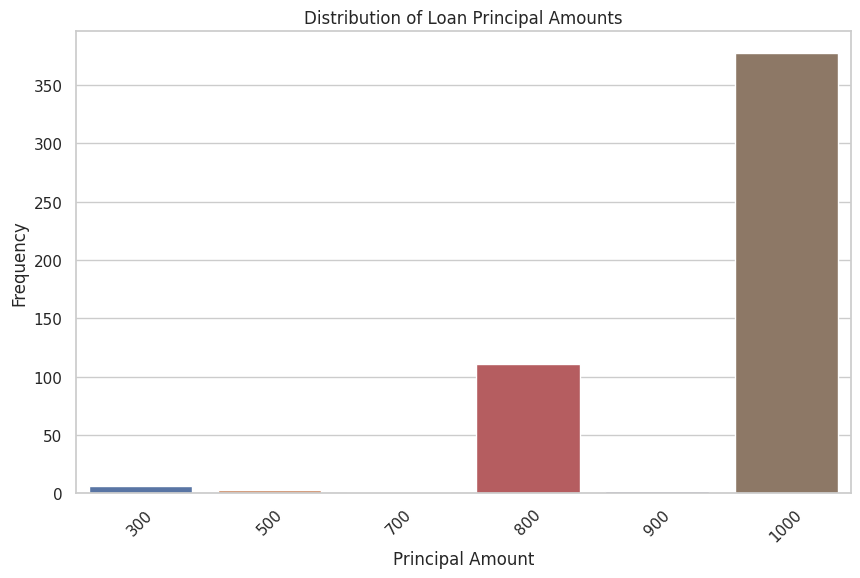

In [ ]:
# Plot values of Principal

# Your Code Here

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data
file_path = '/content/drive/My Drive/Colab Notebooks/fai/utility/data/loan-payments.csv'
df = pd.read_csv(file_path)

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the 'principal' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='principal', data=df)

plt.title('Distribution of Loan Principal Amounts')
plt.xlabel('Principal Amount')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


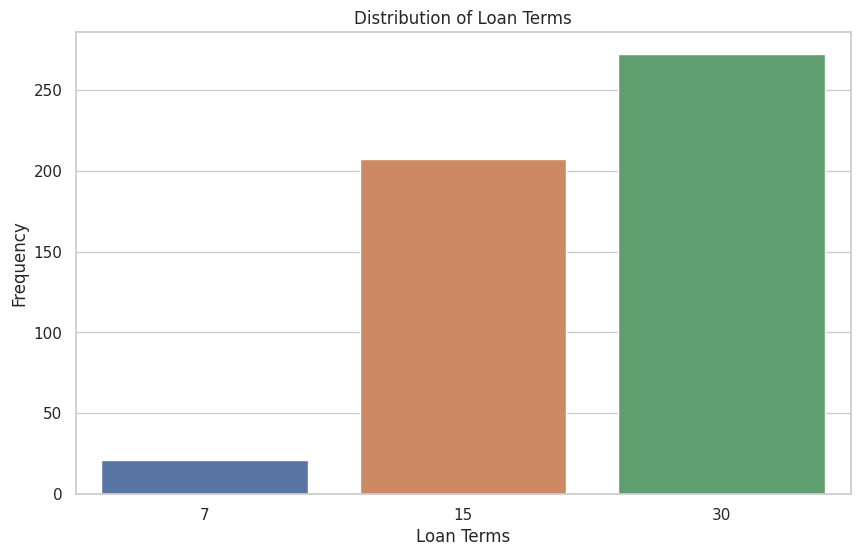

In [ ]:
# Plot values of Terms

# Your Code Here



# Setting the aesthetics for the plots using seaborn
sns.set(style="whitegrid")

# Creating the bar plot for the 'Terms' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='terms', data=df)

# Adding the title and labels
plt.title('Distribution of Loan Terms')
plt.xlabel('Loan Terms')
plt.ylabel('Frequency')

# Display the plot
plt.show()


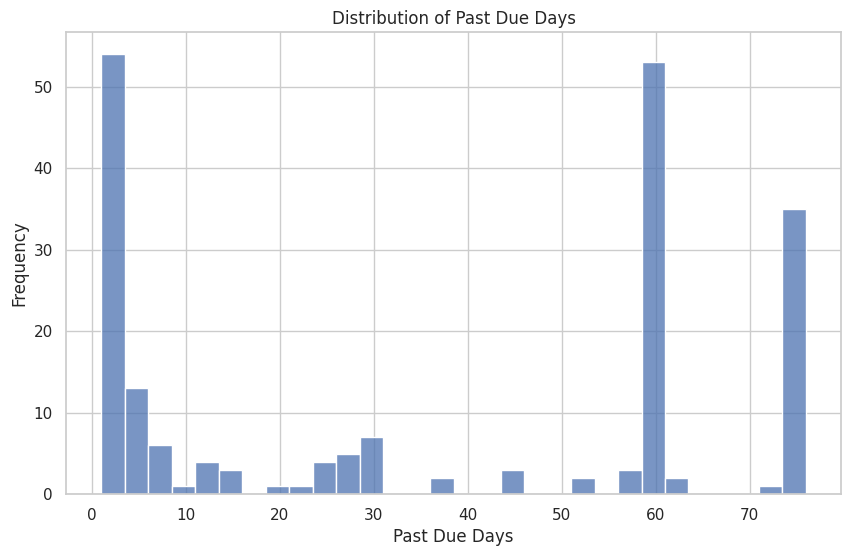

In [ ]:
# Plot values of Past Due Days

# Your Code Here


sns.set(style="whitegrid")

# Creating the histogram for the 'past_due_days' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['past_due_days'], bins=30, kde=False)

# Adding the title and labels
plt.title('Distribution of Past Due Days')
plt.xlabel('Past Due Days')
plt.ylabel('Frequency')

# Display the plot
plt.show()


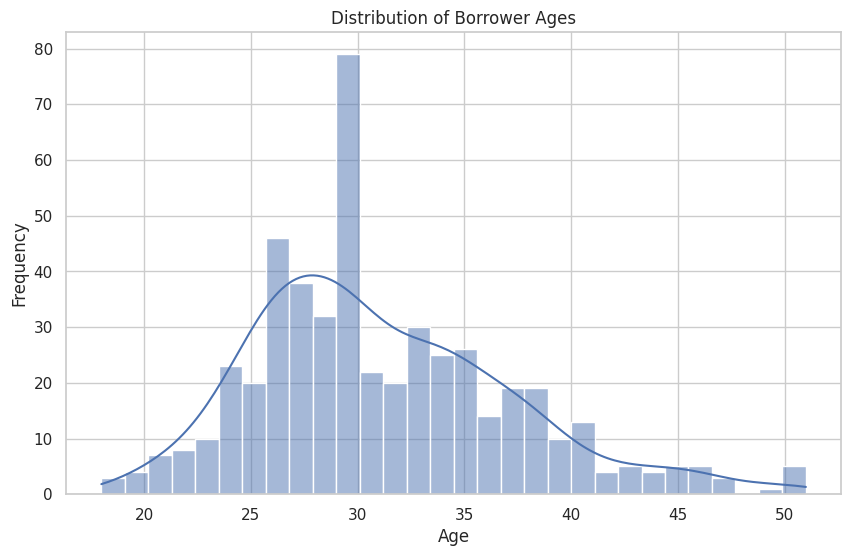

In [ ]:
# Plot values of Age

# Your Code Here



# Setting the aesthetics for the plots using seaborn
sns.set(style="whitegrid")

# Creating the histogram for the 'Age' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)  # 'kde=True' adds a density plot

# Adding the title and labels
plt.title('Distribution of Borrower Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()


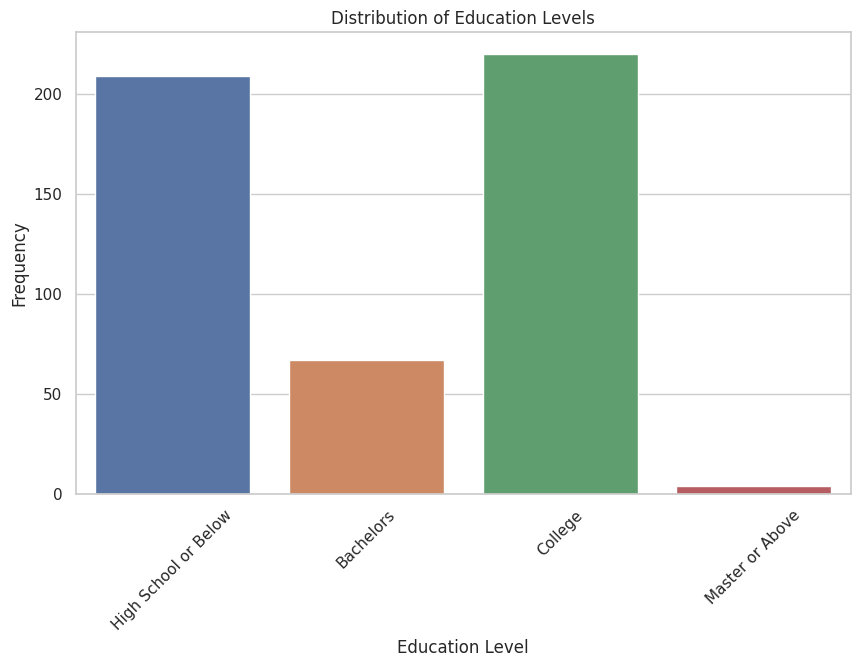

In [ ]:
# Plot values of Education

# Your Code Here


# Setting the aesthetics for the plots using seaborn
sns.set(style="whitegrid")

# Creating the bar plot for the 'Education' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df)

# Adding the title and labels
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the x labels for better readability

# Display the plot
plt.show()


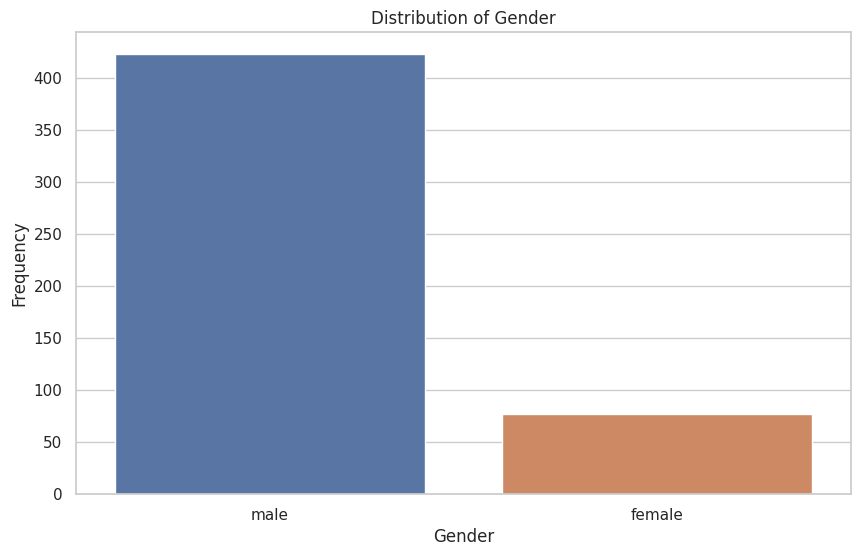

In [ ]:
# Plot values of Gender

# Your Code Here



# Setting the aesthetics for the plots using seaborn
sns.set(style="whitegrid")

# Creating the bar plot for the 'gender' feature
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df)

# Adding the title and labels
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

# Display the plot
plt.show()


## 3. Building a Model

Now that we have a sense for the nuances of our dataset we can try building some models.

![analytics](utility/images/undraw_predictive_analytics_kf9n.png)

Before we continue, we will need to encode our categorical features with enumerations instead of the string values that they currently have. As a reminder, this is what our dataset looks like right now.

In [ ]:
data.head()

,loan_status,principal,terms,past_due_days,age,education,gender
0,PAIDOFF,1000,30,0.0,45,High School or Below,male
1,PAIDOFF,1000,30,0.0,50,Bachelors,female
2,PAIDOFF,1000,30,0.0,33,Bachelors,female
3,PAIDOFF,1000,15,0.0,27,College,male
4,PAIDOFF,1000,30,0.0,28,College,female


An easy way to do this encoding is to use the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) from `sklearn`. In the cell below, we create a list called `categorical` containing the names of the columns corresponding to the categorical features in our dataset. We then create and instance of a `LabelEncoder` and use it to transform the categorical features.

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical = ['loan_status', 'education', 'gender']

# create an instance of a LabelEncoder
encoder = LabelEncoder()

# make a copy of our data
encoded = data.copy()

# apply the encoder's `fit_transform` method to the values for each categorical
# feature column
encoded[categorical] = data[categorical].apply(encoder.fit_transform)

Let's take a look at the results.

In [ ]:
encoded

,loan_status,principal,terms,past_due_days,age,education,gender
0,2,1000,30,0.0,45,2,1
1,2,1000,30,0.0,50,0,0
2,2,1000,30,0.0,33,0,0
3,2,1000,15,0.0,27,1,1
4,2,1000,30,0.0,28,1,0
...,...,...,...,...,...,...,...
495,1,1000,30,3.0,28,2,1
496,1,1000,15,14.0,26,2,1
497,1,800,15,3.0,30,1,1
498,1,1000,30,1.0,38,1,0


Notice how the categorical values like "PAIDOFF" have now been replaced with numbers. We can see which numbers map to each value like this:

In [ ]:
for column in categorical:
    print(*sorted(zip(encoded[column].unique(), data[column].unique()), key=lambda x: x[0]))

(0, 'COLLECTION') (1, 'COLLECTION_PAIDOFF') (2, 'PAIDOFF')
(0, 'Bachelors') (1, 'College') (2, 'High School or Below') (3, 'Master or Above')
(0, 'female') (1, 'male')


Next let's separate our features from our target variable, `loan_status`.

In [ ]:
X, y = encoded.loc[:, encoded.columns != 'loan_status'], encoded.loan_status

### Establishing a Baseline

Now we're ready to start building models. First, let's create a train/test split of our data.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=3)

Then, let's train and evaluate a LogisticRegression model.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

**Try this!** In the cell below, evaluate the model's performance on the testing set using 2 different metrics. **[4 pts]**

In [ ]:
# your code here
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Predictions on the test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# ROC-AUC Score for multi-class classification
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovo')  # or 'ovr'
print("ROC-AUC Score:", roc_auc)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.97
ROC-AUC Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.85      0.92        20
           2       0.97      1.00      0.98        60

    accuracy                           0.97       100
   macro avg       0.97      0.95      0.96       100
weighted avg       0.97      0.97      0.97       100



**Write-up!** How does our model perform on the test set? Explain your answer in terms of the metrics you chose to evaluate performance. **[2 pts]**


    Accuracy (0.97):
        Interpretation: An accuracy of 0.97 means that 97% of the predictions made by the model are correct. This is a high accuracy rate, indicating that the model is very effective at making correct predictions on the test set.


    ROC-AUC Score (1.0):
        Interpretation: A ROC-AUC score of 1.0 is theoretically perfect, meaning that the model has excellent capability to distinguish between the classes with no overlap in the distribution of the predicted probabilities.

    Classification Report (Precision, Recall, F1-Score):
        Interpretation: The classification report provides a more detailed view of the model's performance across different classes.
            Precision: The model has high precision (0.95, 1.00, 0.97 for classes 0, 1, and 2, respectively), indicating a low rate of false positives.
            Recall: The model has high recall for classes 0 and 2 but slightly lower for class 1 (0.85). This means it occasionally misses instances of class 1.
            F1-Score: The F1-scores are high for all classes, suggesting a good balance between precision and recall. The slightly lower F1-score for class 1 (0.92) corresponds to its lower recall.

Let's also try looking at the model's performance on test examples of different genders.

In [ ]:
print(f'''
validation (men) score: {model.score(X_test[X_test['gender'] == 1], y_test[X_test['gender'] == 1]):0.3f}
validation (women) score: {model.score(X_test[X_test['gender'] == 0], y_test[X_test['gender'] == 0]):0.3f}
''')


validation (men) score: 0.988
validation (women) score: 0.889



Yikes!

**Write-up!** What do you notice about these scores? How does these compare with the initial score we saw for the entire test set? What does this imply about our model? **[4 pts]**

The validation scores for men (0.988) and women (0.889) show a significant discrepancy in the model's performance between these two groups.
IMplication:

Comparison with the Initial Test Set Score:

    Overall Test Set Accuracy (0.97): This was high, indicating that the model performs well on the combined dataset.
    Validation Score for Men (0.988): This is even higher than the overall test set accuracy, suggesting that the model is particularly effective at making predictions for this group.
    Validation Score for Women (0.889): This is notably lower than both the overall test set accuracy and the score for men, indicating that the model's effectiveness drops significantly for this group.

Implications for the Model:

    Potential Bias: The disparity in scores suggests that the model may be biased towards men. This could be due to various factors such as an imbalance in the training data (more examples from men than women), differences in the feature distribution between groups, or other biases in the data collection process.

    Need for Balanced Training Data: If the training data contains more examples or more representative features for one gender over the other, the model might learn to predict better for that gender. Ensuring a balanced and representative training dataset is crucial.

    Feature Relevance: The features used to train the model might be more predictive for one gender than the other.

    Model's Generalizability: The lower score for women indicates concerns about the model’s generalizability and fairness. A model performing well on the overall test set but poorly for a specific subgroup cannot be considered for fairness where demographic groups are important.


    Baiscally the discrepancy in validation scores between men and women suggests it might not be treating all groups equally.

### Dropping Gender

So our model is biased with respect to gender and gender is a feature of the model. Would it help to ignore the gender feature during training? Let's try it out.

Let's start by creating another train/test split, but this time using a copy of `X` and `y` that don't include `gender`.

In [ ]:
X_without_gender = X.drop(['gender'], axis=1)

X_train, X_test, y_train, y_test = \
    train_test_split(X_without_gender, y, test_size=0.2, stratify=y, random_state=3)

Let's see what `X_train` looks like now.

In [ ]:
X_train.head()

,principal,terms,past_due_days,age,education
215,1000,30,0.0,29,1
196,1000,30,0.0,29,1
118,1000,30,0.0,35,0
432,800,7,2.0,34,0
496,1000,15,14.0,26,2


Now let's repeat our procedure for our baseline experiment.

In [ ]:
model = LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(X_train, y_train)

print(f'''

validation score: {model.score(X_test, y_test)}
validation (men) score: {model.score(X_test[X.iloc[X_test.index]['gender'] == 1],
                                     y_test[X.iloc[X_test.index]['gender'] == 1]):0.3f}
validation (women) score: {model.score(X_test[X.iloc[X_test.index]['gender'] == 0],
                                       y_test[X.iloc[X_test.index]['gender'] == 0]):0.3f}
''')



validation score: 0.97
validation (men) score: 0.988
validation (women) score: 0.889



The results are the same?

**Write-up!** What might this imply about our model and our data? Why may it not be a good idea to ignore "protected variables" like "gender" when training a model. Record your response below. **[4 pts]**

Implications for the Model and Data

    Bias Embedded in Other Features: The bias observed might not be solely or directly due to the gender feature. Other features in the dataset could be correlated with gender and indirectly causing the bias.

    Historical Bias in Data: The dataset might reflect historical or societal biases. If the data used to train the model contains biased decisions or outcomes from the past, the model could learn and perpetuate these biases, even without explicit gender information.


Importance of Considering Protected Variables

    Inability to Detect and Address Bias: Without these variables, we lose the ability to directly measure and mitigate biases related to them. Analyzing how a model performs across different gender groups is crucial in understanding and addressing potential unfairness.

    Proxy Variables: Other features might serve as proxies for the protected variable. For example, if gender is correlated with certain behaviors or characteristics captured by other features, the model might still learn to discriminate based on those proxies.

    Fairness-Utility Trade-off: In some cases, there might be a trade-off between fairness and the overall performance of the model. Understanding this trade-off requires analyzing the impact of including or excluding protected variables.

    Legality and Ethical Considerations: Depending on the application and jurisdiction, there may be legal and ethical considerations regarding the use of protected variables. In some contexts, it’s important to demonstrate that these variables are not being used inappropriately

## 4. Becoming Data and Fairness Aware

![team](utility/images/undraw_team_spirit_hrr4.png)

The goal of this exercise was to demonstrate how an accuracy score can mislead you into thinking that your model is great and that your mission has been accomplished. By digging only a little bit deeper and evaluating our model's performance on each gender separately, we found that it performed very differently between genders. It was biased!

Just like that, while we were building a model to predict creditworthiness and loan repayment, we ran into the same problem Amazon did with their resume reviewing algorithm. Because the data we used was imbalanced, we introduced bias into our model unintentionally.

If you search online, you will find a myriad of ways that could be used to mitigate the effects of an imbalanced dataset. However, at the end of the day, the **best solution for both Amazon and us is to collect more complete data**.

We have only barely scratched the surface of fairness in Data Science. The field is both complex and emerging. If you are looking for more information about, I recommend starting with [Google's overview](https://developers.google.com/machine-learning/fairness-overview/) of the topic. The [AI Ethics Intro course by Kaggle](https://www.kaggle.com/learn/intro-to-ai-ethics) is another fantastic introductory resource, with more hands-on exercises such as this one. This [PAIR Explorable](https://pair.withgoogle.com/explorables/hidden-bias/) (to be covered in lecture on Nov 28th) offers a visual insight into hidden biases.